In [3]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from wordcloud import WordCloud
from sklearn.metrics import classification_report

# Reading the Data

In [4]:
# Reading the data form csv file
Rec = pd.read_csv('movies.csv')
review = pd.read_csv('senti.csv')
df = pd.read_csv('Training_Data.csv')
df.head()

,review,sentiment
0,"Strictly a routine, by-the-numbers western (di...",negative
1,Without doubt the best of the novels of John L...,positive
2,There is absolutely nothing to redeem this mov...,negative
3,"Sammi, Curr a metal rock god, they tried to st...",positive
4,I thought that this movie was pretty lame. If ...,negative


In [5]:
Rec["review"] = review["review"]

In [6]:
Rec.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,review
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,One of the other reviewers has mentioned that ...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,A wonderful little production. <br /><br />The...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,I thought this was a wonderful way to spend ti...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Basically there's a family where a little boy ...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,"Petter Mattei's ""Love in the Time of Money"" is..."


In [7]:
Rec.shape

(4803, 25)

# Data Analysis

In [8]:
Rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

Text(0.5, 1.0, 'Sentiment distribution')

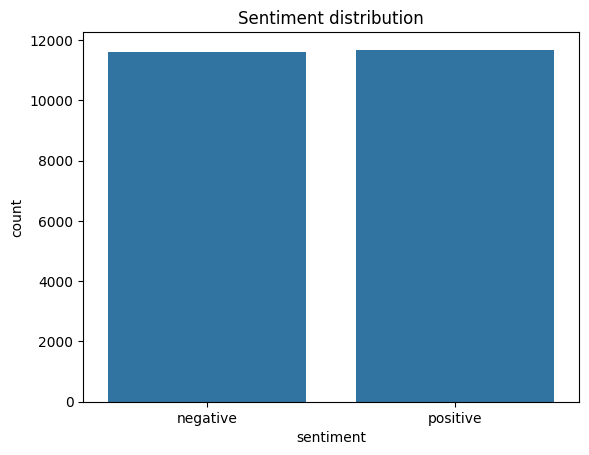

In [9]:
# Ploting the sentiments and reading the review
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [10]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
Strictly a routine, by-the-numbers western (directed by genre-mainstay Andrew V. McLaglen, so is that any wonder?). Army colonel Brian Keith spars with smarmy bandit Dean Martin, who has just kidnapped the colonel's wife (Honor Blackman, who never found her niche after playing Pussy Galore in "Goldfinger"). Fist-fights, shoot-outs, stagecoach robberies and Denver Pyle in a supporting role...in other words, absolutely nothing new or original. Talking in a low monotone throughout, Keith gets to dally with a prostitute (something of a shock after his run on TV's "Family Affair"), but otherwise this low-rent material wastes Keith's amiable talents. It's also bad news for Dino, who doesn't seem to notice or care. Hack direction, poor writing and several unfunny attempts at lowball humor. * from **** 

Sentiment:  negative 


Review:  [1]
Without doubt the best of the novels of John Le Carre, exquisitely transformed into a classic film. Performances by Peter Egan (Magnus Pym, Th

In [11]:
def no_of_words(text):
#     text = str(text)
    words= text.split()
    word_count = len(words)
    return word_count

In [12]:
df['word count'] = df['review'].apply(no_of_words)

In [13]:
df.head()

,review,sentiment,word count
0,"Strictly a routine, by-the-numbers western (di...",negative,124
1,Without doubt the best of the novels of John L...,positive,182
2,There is absolutely nothing to redeem this mov...,negative,154
3,"Sammi, Curr a metal rock god, they tried to st...",positive,309
4,I thought that this movie was pretty lame. If ...,negative,65


In [14]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

C:\Users\bhoik\AppData\Local\Temp\ipykernel_16556\958894597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive", 1, inplace=True)
C:\Users\bhoik\AppData\Local\Temp\ipykernel_16556\958894597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [15]:
df.head()

,review,sentiment,word count
0,"Strictly a routine, by-the-numbers western (di...",2,124
1,Without doubt the best of the novels of John L...,1,182
2,There is absolutely nothing to redeem this mov...,2,154
3,"Sammi, Curr a metal rock god, they tried to st...",1,309
4,I thought that this movie was pretty lame. If ...,2,65


# Data Preprocessing

In [16]:
def data_processing(text):
#     text = str(text)
    text= text.lower()
    text = re.sub('br /', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
df.review = df['review'].apply(data_processing)

In [18]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  95


In [19]:
df = df.drop_duplicates('review')

In [20]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [21]:
df.review = df['review'].apply(lambda x: stemming(x))

In [22]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,strictly routine bythenumbers western directed...,2,82
1,without doubt best novels john le carre exquis...,1,105
2,absolutely nothing redeem movie took sleazy st...,2,76
3,sammi curr metal rock god tried stop tried ban...,1,158
4,thought movie pretty lame youre looking cheese...,2,31


# Data Visulization

In [23]:
# Seperating the positive feed back movies
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
1,without doubt best novels john le carre exquis...,1,105
3,sammi curr metal rock god tried stop tried ban...,1,158
5,one favorite movies date starts adventure wild...,1,98
6,great movie would compare movie game get end f...,1,104
7,cant believe bostocks cup isnt available prope...,1,63


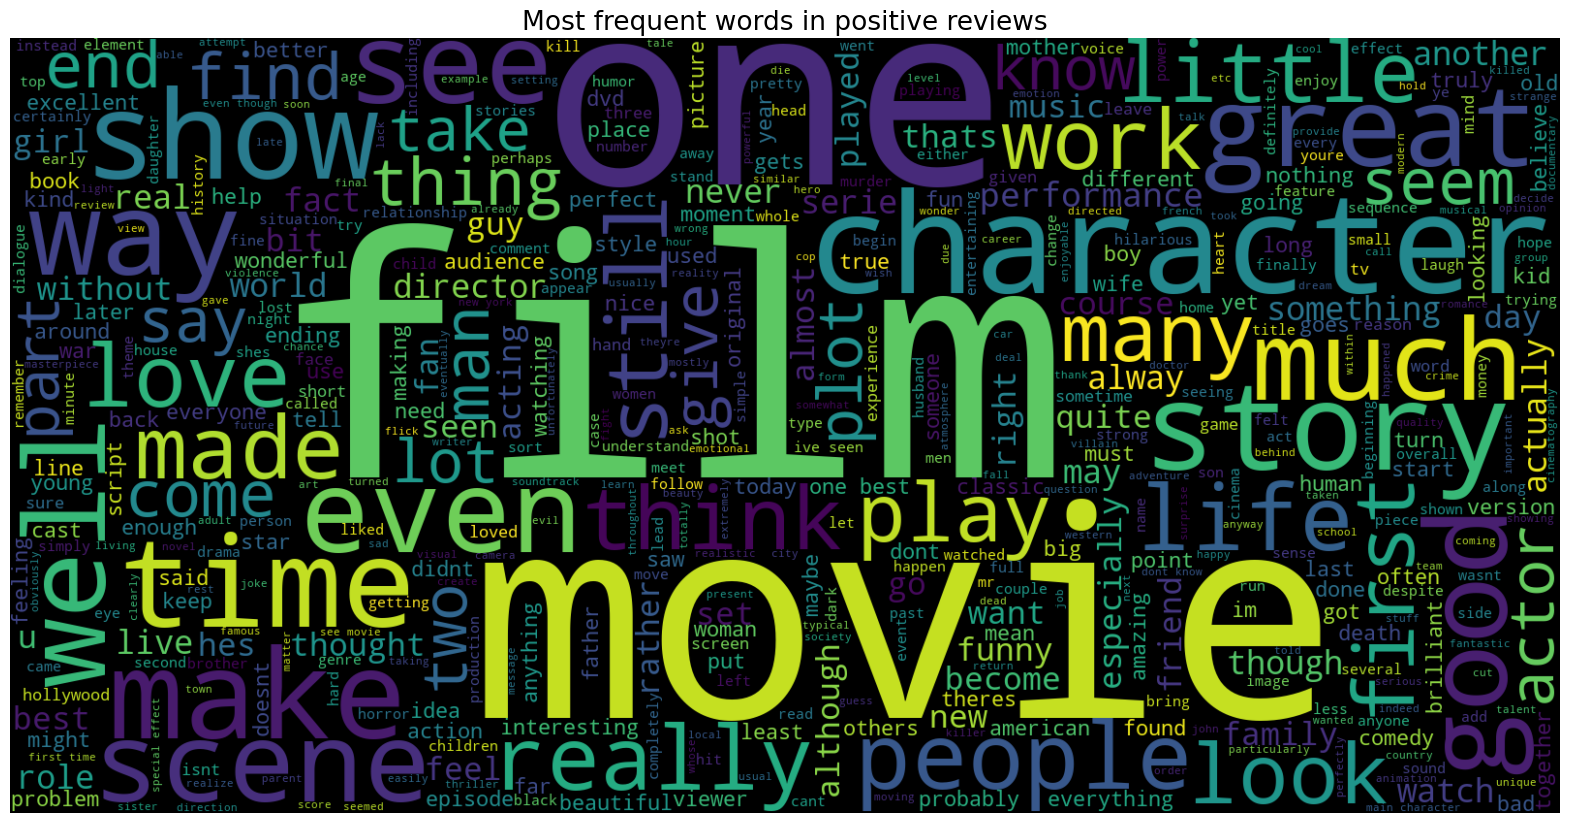

In [24]:
# Visualizing the the most frequent occuring words in positive review
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [25]:
# Count of freqent words in positive review
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 18726),
 ('movie', 16856),
 ('one', 12048),
 ('like', 8079),
 ('good', 6762),
 ('great', 5878),
 ('story', 5823),
 ('time', 5563),
 ('see', 5500),
 ('well', 5173),
 ('really', 4955),
 ('would', 4887),
 ('also', 4871),
 ('even', 4338),
 ('much', 4138)]

In [26]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,18726
1,movie,16856
2,one,12048
3,like,8079
4,good,6762


In [28]:
# Seperating the Negative feed back movies
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()


,review,sentiment,word count
0,strictly routine bythenumbers western directed...,2,82
2,absolutely nothing redeem movie took sleazy st...,2,76
4,thought movie pretty lame youre looking cheese...,2,31
10,james gandolfini good actor ever take role pie...,2,66
12,somewhere site someone wrote get best version ...,2,173


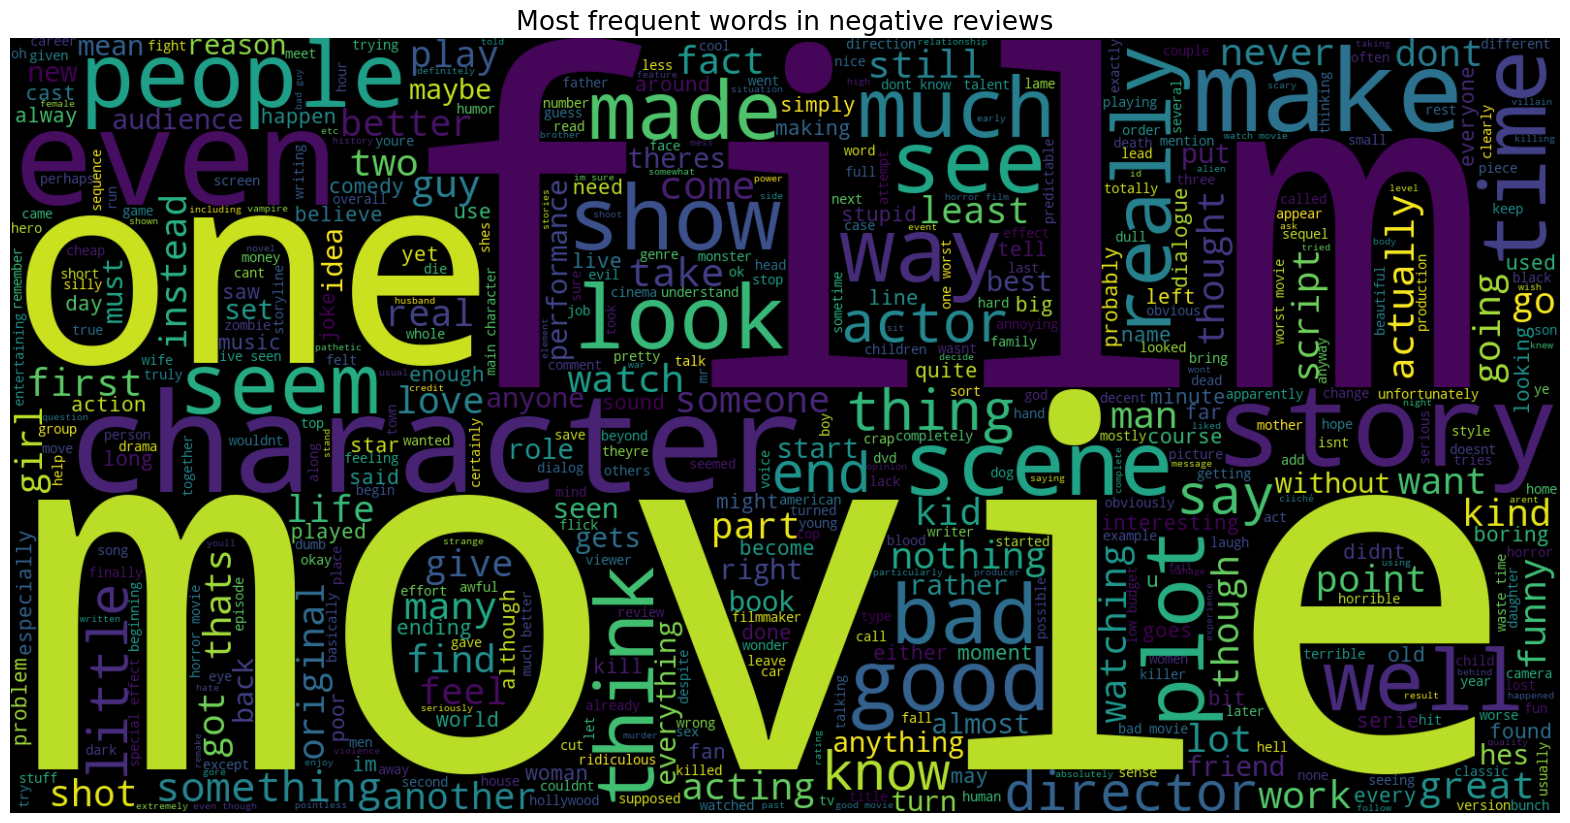

In [29]:
# Visualizing the the most frequent occuring words in negative review
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [30]:
# Count of freqent words in negative review
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 22044),
 ('film', 16012),
 ('one', 11323),
 ('like', 10058),
 ('even', 6943),
 ('good', 6574),
 ('bad', 6462),
 ('would', 6276),
 ('really', 5571),
 ('time', 5328),
 ('see', 4858),
 ('get', 4672),
 ('dont', 4669),
 ('much', 4548),
 ('story', 4401)]

In [31]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,22044
1,film,16012
2,one,11323
3,like,10058
4,even,6943


# Data Classification

In [34]:
#Vectorizing the data

tfidf = TfidfVectorizer(max_features=5000)
X = df['review']
y = df['sentiment']

X = tfidf.fit_transform(X)
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1795802 stored elements and shape (23188, 5000)>

In [35]:
# Spliting the data into train and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Model

In [36]:
# Model 
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [37]:
# print(classification_report(y_test, y_pred))

In [38]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [39]:
# replacing the null valuess with null string

for feature in selected_features:
    Rec[feature] = Rec[feature].fillna('')

In [40]:
# combining all the 5 selected features
combined_features = Rec['genres']+' '+Rec['keywords']+' '+Rec['tagline']+' '+Rec['cast']+' '+Rec['director']

In [41]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [42]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [43]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [44]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

In [45]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

# Testing The Model

In [46]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

In [47]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = Rec['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [48]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Avatar']


In [49]:
close_match = find_close_match[0]
print(close_match)

Avatar


In [50]:
# finding the index of the movie with title

index_of_the_movie = Rec[Rec.title == close_match]['index'].values[0]
print(index_of_the_movie)

0


In [51]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, np.float64(1.0)), (1, np.float64(0.07219486822992488)), (2, np.float64(0.037732999577179294)), (3, np.float64(0.012520204623868908)), (4, np.float64(0.10702574467235304)), (5, np.float64(0.07786899789424222)), (6, np.float64(0.008237143013608844)), (7, np.float64(0.03613473061484885)), (8, np.float64(0.02960930964063025)), (9, np.float64(0.026287167439951735)), (10, np.float64(0.09261074046755373)), (11, np.float64(0.012717759249124133)), (12, np.float64(0.02721736008310012)), (13, np.float64(0.029569752523347516)), (14, np.float64(0.06915925473724743)), (15, np.float64(0.019551594499309027)), (16, np.float64(0.034263405780616416)), (17, np.float64(0.02603656461429414)), (18, np.float64(0.05714759266672412)), (19, np.float64(0.0389505953521203)), (20, np.float64(0.03971480215415496)), (21, np.float64(0.01201480380565613)), (22, np.float64(0.030438694261989592)), (23, np.float64(0.045926535588179496)), (24, np.float64(0.04623989017965258)), (25, np.float64(0.04284926095950226)), (2

In [52]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(0, np.float64(1.0)), (3158, np.float64(0.2494676630753241)), (2403, np.float64(0.24841462595906272)), (94, np.float64(0.24505931974059822)), (56, np.float64(0.20378069648285427)), (47, np.float64(0.20115287461144912)), (1053, np.float64(0.19702752258651424)), (838, np.float64(0.18017023369312363)), (3730, np.float64(0.1764624118531341)), (4593, np.float64(0.17448845797415172)), (239, np.float64(0.17441748680810656)), (1531, np.float64(0.1682605817219649)), (2696, np.float64(0.1650346025917652)), (812, np.float64(0.16062301907491794)), (643, np.float64(0.15644455512484967)), (4401, np.float64(0.15468923545220403)), (2198, np.float64(0.15217161971893786)), (770, np.float64(0.1502572672775349)), (1951, np.float64(0.14933372705282924)), (2229, np.float64(0.14661801285492254)), (1922, np.float64(0.14481974301913123)), (206, np.float64(0.14226144606175548)), (3208, np.float64(0.1401230206493547)), (1759, np.float64(0.13899056016968867)), (43, np.float64(0.1348209130228474)), (1473, np.floa

In [53]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')
i = 1

try:
    for movie in sorted_similar_movies:
      index = movie[0]
      title_from_index = Rec[Rec.index==index]['title'].values[0]
      if (i<30):
        print(i, '.',title_from_index)
        i+=1
except Exception as e:
    print("\nChoose any movie")

Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander


In [54]:
index=index_of_the_movie
Review_from_index = Rec[Rec.index==index]['review'].values[0]

In [55]:
x=Review_from_index 
x = data_processing(x)
vec = tfidf.transform([x])
result = clf.predict(vec)
if result == [1]:
    print("*************************************************************************************")
    print("The Review of the movie is Positive ")
else:
    print("*************************************************************************************")
    print("The Review of the movie is Negative")


*************************************************************************************
The Review of the movie is Positive 
